## Data Augmentation Example

In [11]:
import random
import PIL
import torch
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torchvision
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# ----------------
# SETTINGS
# ----------------
RANDOM_SEED = 10
BATCH_SIZE = 128
NUM_EPOCHS = 100

In [13]:
train_dataset = datasets.MNIST(root='mnist',
               train=True,
               transform=transforms.ToTensor(),
               download=True)

test_dataset = datasets.MNIST(root='mnist',
               train=False,
               transform=transforms.ToTensor())

train_loader = DataLoader(dataset=train_dataset,
           batch_size=BATCH_SIZE,
           shuffle=True)

test_loader = DataLoader(dataset=test_dataset,
           batch_size=BATCH_SIZE,
           shuffle=False)

Shape of Feature Image:  torch.Size([128, 1, 28, 28])
Shape of Labeled Image:  torch.Size([128])


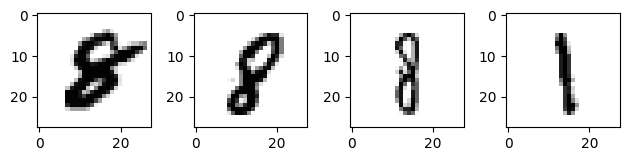

In [14]:
random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

for features_img, labels_img in train_loader:
    print("Shape of Feature Image: ", features_img.shape)
    print("Shape of Labeled Image: ", labels_img.shape)
    break

fig, ax = plt.subplots(1, 4)
for i in range(4):
    ax[i].imshow(features_img[i].view(28, 28).numpy(), cmap='binary')

plt.tight_layout()

In [16]:
import PIL.Image

training_transform_1 = transforms.Compose([
    torchvision.transforms.Resize(size=(32, 32)),
    torchvision.transforms.RandomCrop(size=(28, 28)),
    torchvision.transforms.RandomRotation(degrees=30, interpolation=PIL.Image.BILINEAR),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=(0.5,), std=(0.5,)),
])

test_transform_1 = transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize(size=(32, 32)),
    torchvision.transforms.CenterCrop(size=(28, 28)),
    torchvision.transforms.Normalize(mean=(0.5,), std=(0.5,)),
])

In [19]:

train_dataset_1 = datasets.MNIST(root='mnist_copy',
                train=True,
                transform=training_transform_1,
                download=True)

test_dataset_1 = datasets.MNIST(root='mnist_copy',
               train=False,
               transform=test_transform_1)

train_loader_1 = DataLoader(dataset=train_dataset_1,
           batch_size=BATCH_SIZE,
           shuffle=True)

test_loader_1 = DataLoader(dataset=test_dataset_1,
           batch_size=BATCH_SIZE,
           shuffle=False)


Shape of Features Images:  torch.Size([128, 1, 28, 28])
Shape of Labeled Images:  torch.Size([128])


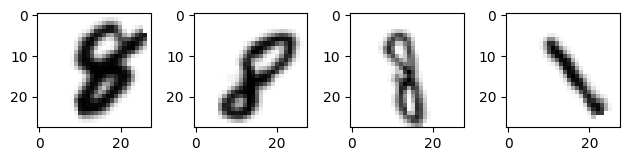

In [21]:
random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

for features, labels in train_loader_1:
    print("Shape of Features Images: ", features.shape)
    print("Shape of Labeled Images: ", labels.shape)
    break

fig, ax = plt.subplots(1, 4)
for i in range(4):
    ax[i].imshow(features[i].view(28, 28).numpy(), cmap='binary')
plt.tight_layout()